In [1]:
import numpy as np

def GDLangevin(E, grad_E, parametersGD, V0):
    """
    Performs Gradient Descent and the Langevin Dynamics (SGD).
    
    Parameters:
        E: Objective function E (as a Python callable function)
        grad_E: Gradient of the objective function (as a Python callable function)
        parametersGD: Dictionary with parameters for GD
                      Includes 'K' (number of time steps), 'dt' (time step size),
                      'learning_rate', 'sigma' (noise parameter in Langevin dynamics)
        V0: Initial position (NumPy array)
        
    Returns:
        vstar_approx: Approximation to vstar (NumPy array)
    """
    
    # Extract parameters
    K = parametersGD['K']
    dt = parametersGD['dt']
    learning_rate = parametersGD['learning_rate']
    sigma = parametersGD['sigma']
    
    # Initialization
    V = V0
    
    # GD / Annealed Langevin Dynamics
    for k in range(K):
        # Gradient computation
        if grad_E is None:
            h = 1e-5
            gradE = np.zeros_like(V)
            for i in range(len(V)):
                dV = np.zeros_like(V)
                dV[i] = 1
                gradE[i] = (E(V + h * dV) - E(V - h * dV)) / (2 * h)
        else:
            gradE = grad_E(V)
        
        # Position updates of one iteration of GD / Annealed Langevin
        noise = sigma / np.log(k + 2) * np.sqrt(dt) * np.random.randn(*V.shape)
        V = V - learning_rate * gradE * dt + noise
    
    return V

In [13]:
# Check that code is working. Optimizing convex function x^2
def E(x):
    return np.sum(x**2)

def grad_E(x):
    return 2 * x

# Parameters
parametersGD = {
    'K': 200,  # Number of iterations
    'dt': 1.0,  # Time step size
    'learning_rate': 0.1,
    'sigma': 0.2,  # Noise parameter
}

V0 = np.array([10.0, -11.0])  # Initial position

# Call the function
vstar_approx = GDLangevin(E, grad_E, parametersGD, V0)
print("Approximation to vstar:", vstar_approx)

Approximation to vstar: [ 0.0804569 -0.0245266]


In [15]:
# Energy Functions
def ackley_function(x):
    """
    Computes the Ackley function for a 2D input vector x.
    """
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum_sq = x[0]**2 + x[1]**2
    sum_cos = np.cos(c * x[0]) + np.cos(c * x[1])
    return -a * np.exp(-b * np.sqrt(sum_sq / 2.0)) - np.exp(sum_cos / 2.0) + a + np.e


 # The Rastrigin function? What else can be explored?
def rastrigin_function(x):
    """
    Computes the Rastrigin function for a 2D input vector x.
    """
    A = 10
    n = 2
    return A * n + (x[0]**2 - A * np.cos(2 * np.pi * x[0])) + (x[1]**2 - A * np.cos(2 * np.pi * x[1]))


In [27]:
import matplotlib.pyplot as plt

def GDLangevin(E, grad_E, parametersGD, V0):
    K = parametersGD['K']
    dt = parametersGD['dt']
    learning_rate = parametersGD['learning_rate']
    sigma = parametersGD['sigma']
    V = V0
    
    # To store position history for plotting
    V_history = [V.copy()]
    
    for k in range(K):
        if grad_E is None:
            h = 1e-5
            gradE = np.zeros_like(V)
            for i in range(len(V)):
                dV = np.zeros_like(V)
                dV[i] = 1
                gradE[i] = (E(V + h * dV) - E(V - h * dV)) / (2 * h)
        else:
            gradE = grad_E(V)
        
        noise = sigma / np.log(k + 2) * np.sqrt(dt) * np.random.randn(*V.shape)
        V = V - learning_rate * gradE * dt + noise
        V_history.append(V.copy())
    
    return V, np.array(V_history)

# let's create a function to plot the Ackley function and the optimization path
def plot_ackley_path(V_history, w=1, h=1):
    # Create a grid of points for the Ackley function
    x = np.linspace(-w, w, 500)
    y = np.linspace(-h, h, 500)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = ackley_function(np.array([X[i,j], Y[i,j]]))
    
    # Plot Ackley function contour
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Ackley Function Optimization Path')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Plot the optimization path
    plt.plot(V_history[:,0], V_history[:,1], 'r.-', label='Optimization Path')
    plt.scatter(V_history[0,0], V_history[0,1], color='red', label='Start')
    plt.scatter(V_history[-1,0], V_history[-1,1], color='blue', label='End')
    plt.legend()
    plt.show()


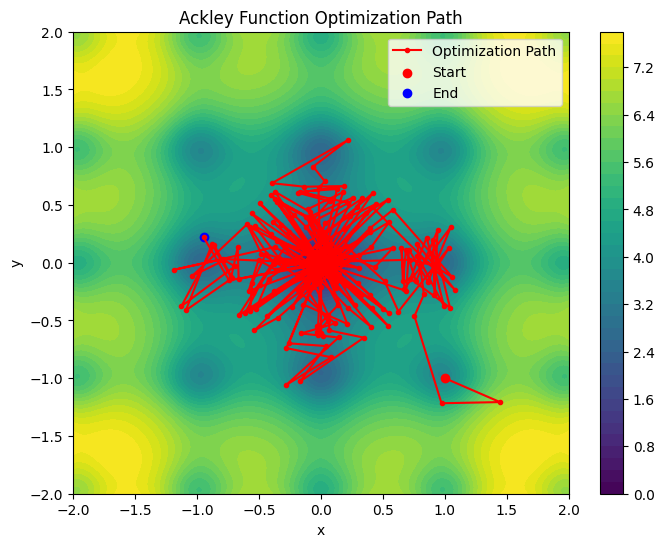

In [29]:
# # Example usage
V0 = np.array([1, -1])  # Initial guess
vstar_approx, V_history = GDLangevin(ackley_function, None, parametersGD, V0)
plot_ackley_path(V_history, w=2, h=2)

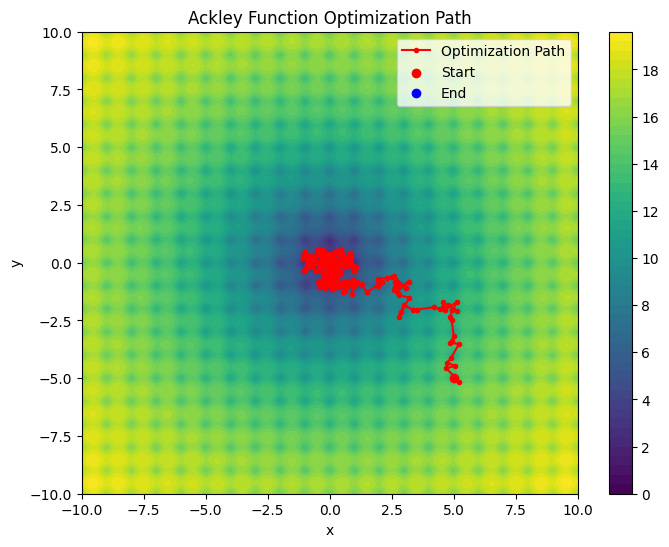

In [33]:
# Example usage: initial guss is far away
V0 = np.array([5, -5])  # Initial guess
vstar_approx, V_history = GDLangevin(ackley_function, None, parametersGD, V0)
plot_ackley_path(V_history,  w=10, h=10)

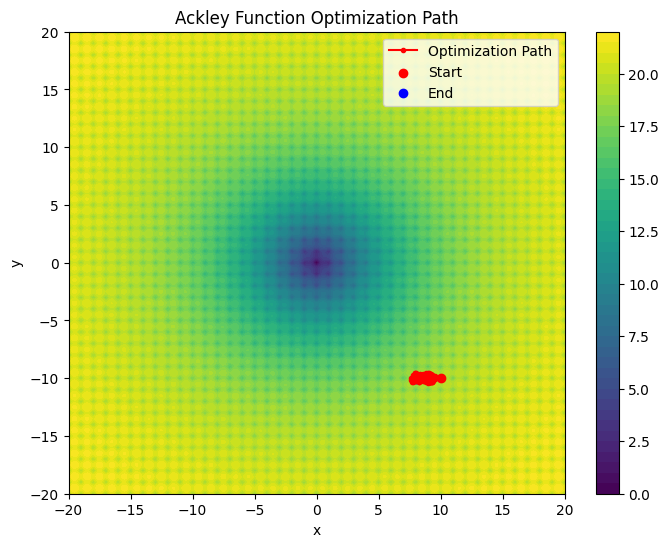

In [34]:
# Example usage: initial guss is far away
V0 = np.array([10, -10])  # Initial guess
vstar_approx, V_history = GDLangevin(ackley_function, None, parametersGD, V0)
plot_ackley_path(V_history,  w=20, h=20)

In [35]:
# Only numbers:
def GDLangevin(E, grad_E, parametersGD, V0):
    K = parametersGD['K']
    dt = parametersGD['dt']
    learning_rate = parametersGD['learning_rate']
    sigma = parametersGD['sigma']
    V = V0
    
    for k in range(K):
        if grad_E is None:
            h = 1e-5
            gradE = np.zeros_like(V)
            for i in range(len(V)):
                dV = np.zeros_like(V)
                dV[i] = 1
                gradE[i] = (E(V + h * dV) - E(V - h * dV)) / (2 * h)
        else:
            gradE = grad_E(V)
        
        noise = sigma / np.log(k + 2) * np.sqrt(dt) * np.random.randn(*V.shape)
        V = V - learning_rate * gradE * dt + noise
    
    return V

# Parameters for Gradient Descent and Langevin Dynamics
parametersGD = {
    'K': 10000,  # Increase the number of iterations for better accuracy
    'dt': 1.0,
    'learning_rate': 0.01,  # Adjust learning rate as needed
    'sigma': 0.1,  # Noise parameter, adjust based on experimentation
}

V0 = np.array([0.5, -0.5])  # Initial guess

# Finding local minimum of the Ackley function
vstar_approx = GDLangevin(ackley_function, None, parametersGD, V0)
print("Approximation to local minimum of Ackley function:", vstar_approx)
print("Function value at this point:", ackley_function(vstar_approx))

Approximation to local minimum of Ackley function: [0.01630719 0.00397126]
Function value at this point: 0.05495611350108165


In [ ]:
def plot_function_path(V_history, func, title='Function Optimization Path'):
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.plot(V_history[:,0], V_history[:,1], 'r.-', label='Path')
    plt.plot(V_history[0,0], V_history[0,1], 'go', label='Start')
    plt.plot(V_history[-1,0], V_history[-1,1], 'bo', label='End')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Example usage with the Rastrigin function
parametersGD['K'] = 5000  # Adjust K for more iterations if necessary
V0 = np.array([3.0, 3.0])  # Starting point
vstar_approx, V_history = GDLangevin(rastrigin_function, None, parametersGD, V0)
plot_function_path(V_history, rastrigin_function, 'Rastrigin Function Optimization Path')